<a href="https://colab.research.google.com/github/Marcos-Tonari-Diaz/Desafio_Bain_2022/blob/development/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bain Stategic Challenge 2022
### Team: "Os Normalizados"


*   Guilerme Ramirez
*   João Segato Kruse
*   Marcos Gabriel Barboza Dure Diaz

https://desafioestrategicobain.com/




# Data Loading

In [100]:
import pandas as pd

In [101]:
historical_database = pd.read_csv("historical-database.csv", sep=';', parse_dates=['year'], dtype={'city_code':"category", 'product_type':"category", 'product':"category"})

In [102]:
historical_database

,year,city_code,product_type,product,"destinated_area,"
0,1974-01-01,960b4f2c94a2fb2c,temporary,Others,"0,"
1,1974-01-01,746cc42bfb8f6b62,temporary,Others,"0,"
2,1974-01-01,6cce2bf873870afc,temporary,Others,"0,"
3,1974-01-01,4de42e351006a2ae,temporary,Others,"0,"
4,1974-01-01,5b6072f8f6d37acc,temporary,Others,"0,"
...,...,...,...,...,...
73739,2013-01-01,74d75dde6dc4a5ec,pasture,Livestock,"150866,5644"
73740,2014-01-01,74d75dde6dc4a5ec,pasture,Livestock,"152446,396"
73741,2015-01-01,74d75dde6dc4a5ec,pasture,Livestock,"154681,0205"
73742,2016-01-01,74d75dde6dc4a5ec,pasture,Livestock,"164706,2778"


In [103]:
historical_database['year'] = pd.DatetimeIndex(historical_database['year']).year

In [104]:
historical_database = historical_database.rename(columns = {'destinated_area,':'destinated_area'})

In [105]:
str_list = ['0,', '2,', '3,4', ',']
#add_zero_after_comma = lambda num_str : num_str+'0' if num_str[-1] == ',' else num_str
add_zero_after_comma = lambda num_str : num_str+'0' if num_str[-1] == ',' and len(num_str)!=1 else num_str
str_list = list(map(add_zero_after_comma, str_list))
str_list

['0,0', '2,0', '3,4', ',']

In [106]:
historical_database['destinated_area'] = historical_database['destinated_area'].apply(add_zero_after_comma)
historical_database['destinated_area'] = pd.to_numeric(historical_database['destinated_area'].str.replace(',', '.'), errors='coerce')

In [107]:
historical_database

,year,city_code,product_type,product,destinated_area
0,1974,960b4f2c94a2fb2c,temporary,Others,0.0000
1,1974,746cc42bfb8f6b62,temporary,Others,0.0000
2,1974,6cce2bf873870afc,temporary,Others,0.0000
3,1974,4de42e351006a2ae,temporary,Others,0.0000
4,1974,5b6072f8f6d37acc,temporary,Others,0.0000
...,...,...,...,...,...
73739,2013,74d75dde6dc4a5ec,pasture,Livestock,150866.5644
73740,2014,74d75dde6dc4a5ec,pasture,Livestock,152446.3960
73741,2015,74d75dde6dc4a5ec,pasture,Livestock,154681.0205
73742,2016,74d75dde6dc4a5ec,pasture,Livestock,164706.2778


In [108]:
historical_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73744 entries, 0 to 73743
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             73744 non-null  int64   
 1   city_code        73744 non-null  category
 2   product_type     73744 non-null  category
 3   product          73744 non-null  category
 4   destinated_area  34709 non-null  float64 
dtypes: category(3), float64(1), int64(1)
memory usage: 1.4 MB


# Data Analysis

In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
historical_database.describe(include="all")

,year,city_code,product_type,product,destinated_area
count,73744.000000,73744,73744,73744,3.470900e+04
unique,NaN,144,3,11,NaN
top,NaN,0307883b5d063703,temporary,Others,NaN
freq,NaN,517,43824,12584,NaN
mean,1995.854415,NaN,NaN,NaN,1.443392e+04
std,12.590770,NaN,NaN,NaN,6.221689e+04
min,1974.000000,NaN,NaN,NaN,0.000000e+00
25%,1985.000000,NaN,NaN,NaN,2.800000e+01
50%,1996.000000,NaN,NaN,NaN,3.000000e+02
75%,2007.000000,NaN,NaN,NaN,2.011000e+03


In [111]:
#check for duplicate rows
np.count_nonzero(historical_database.duplicated())

0

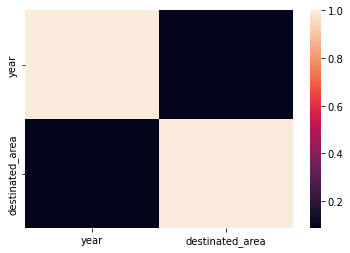

In [112]:
sns.heatmap(historical_database.corr())

In [113]:
historical_database.corr()

,year,destinated_area
year,1.000000,0.087694
destinated_area,0.087694,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


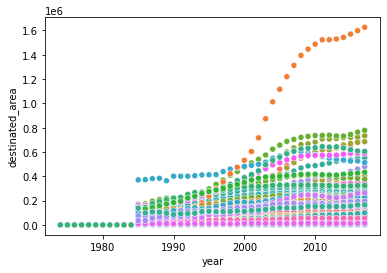

In [119]:
sns.scatterplot(historical_database['year'], historical_database['destinated_area'], hue=historical_database['city_code'], legend=False)